## Simple decision trees

Can you do better than the k-NN model with decision trees?
- What accuracy can you achieve with a depth of 3?
- Plot the corresponding tree with graphviz
- Do you get better results if you reduce the number of dimensions with PCA  first?

In [1]:
import numpy as np
import pandas as pd

In [2]:
with np.load('train.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_train = npz_file['features']
    y_train = npz_file['targets']

with np.load('valid.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_valid = npz_file['features']
    y_valid = npz_file['targets']

with np.load('test.npz', allow_pickle=False) as npz_file:
    # Load the arrays
    x_test = npz_file['features']
    y_test = npz_file['targets']

# X = np.concatenate((x_train, x_valid, x_test), axis=0)
# y = np.concatenate((y_train, y_valid, y_test), axis=0)

Again, the data has already been standardized during the feature extraction process.It's possible to standardize the data with TensorFlow, but especially in the case of images, this might not be what you want. Dividing by 255 should be enough to do the necessary preprocessing here.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(x_train, y_train)
dt.score(x_valid,y_valid)

0.302158273381295

The accuracy of a (notably untuned) decision tree with a depth of 3 is 30% which is significantly worse than the tuned k-nn score.

In [5]:
from sklearn.tree import export_graphviz

In [6]:
# Export decision tree
dot_data = export_graphviz(
    dt, out_file=None,
    filled=True, rounded=True, proportion=True
)

In [7]:
import graphviz

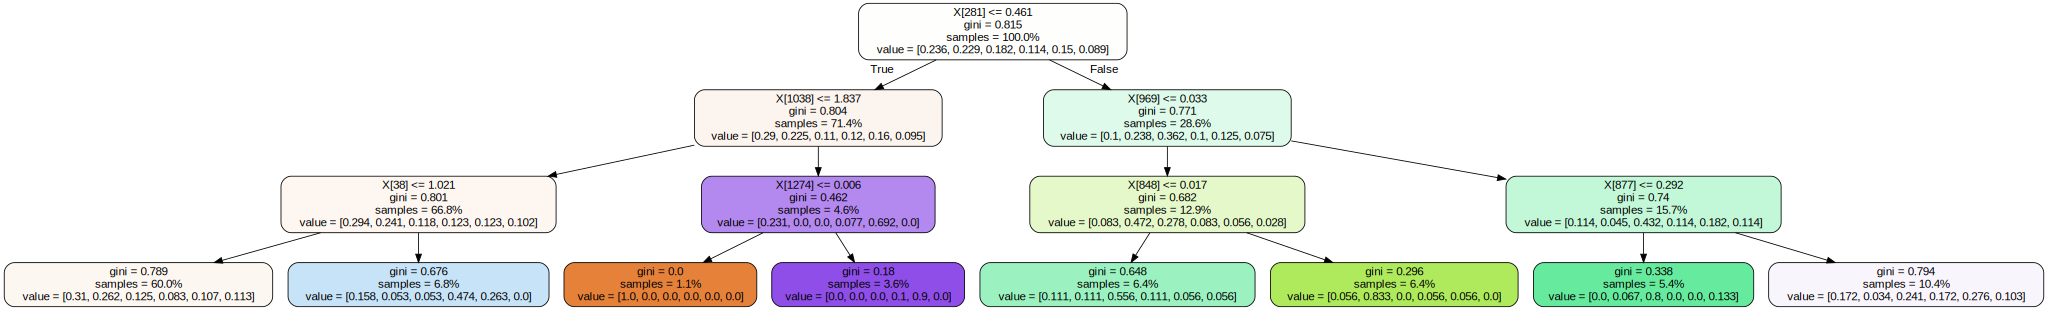

In [8]:
# Display decision tree
graphviz.Source(dot_data)

Reduce the number of dimensions with PCA first:

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [10]:
# Create PCA transformer
pca_1 = PCA(n_components=None)

# Apply PCA to rescaled data
pca_1.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pipeline = Pipeline([
    ('pca', PCA(n_components=None)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=0))
])

In [12]:
pipeline.fit(x_train, y_train)
pipeline.score(x_valid,y_valid)

0.26618705035971224

The result slightly decreased with PCA applied first.

--------------

Store the model names and the accuracy on the test data in a .csv file:

In [13]:
dt.score(x_test, y_test)

0.36

In [14]:
Test_accuracy_04_Simple_decision_tree =  pd.DataFrame(data = {'model': ['decision tree'], 'test_acurracy': [dt.score(x_test, y_test)]})

In [16]:
Test_accuracy_04_Simple_decision_tree.to_csv(path_or_buf = r'C:\Users\heyus\Desktop\Desktop\EPFL_Data Science COS\EPFL\04. Applied Machine Learning 2\11. Course project\Test_accuracy_04_Simple_decision_tree.csv')